# Machine Learning project

## **Sommaire:**

---



1. Imporation des bibliothéques
2. Importer les fichiers
3. Fusion des DataFrame et modification
4. Description de notre dataset
5. Suppresion des informations discriminantes
6. Pré-traitement des données
7. Corrélation
8. Analyse statistique
9. Developpement des modèles





## 1- Imporation des bibliothéques.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
from zipfile import ZipFile
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## 2- Importer les fichiers

In [2]:
info = pd.read_csv("data/general_data.csv")
info.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
emploi=pd.read_csv("data/employee_survey_data.csv")
emploi.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [4]:
manager=pd.read_csv("data/manager_survey_data.csv")
manager.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [5]:
# extraction des deux csv du zip
file = "data/in_out_time.zip"

with ZipFile(file, 'r') as zip:
    zip.extractall()
    in_time=pd.read_csv("in_time.csv")
    out_time=pd.read_csv("out_time.csv")


## 3- Fusion des DataFrame et modification

In [6]:
#Fusion des 3 DataFrame ou l'on trouve EmployeeID
all_info = pd.merge(info, emploi, on='EmployeeID')
all_info = pd.merge(all_info, manager, on='EmployeeID')
all_info = all_info[['EmployeeID'] + [col for col in all_info.columns if col != 'EmployeeID']]
all_info.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
#Renomme pour temps de sorti le unnamed par l'id et modifie la date pour plus lisible
in_time = in_time.rename(columns={'Unnamed: 0': 'EmployeeID'})
out_time = in_time.rename(columns={'Unnamed: 0': 'EmployeeID'})

out_time.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [ ]:
in_time.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


## 4- Description de notre dataset

In [ ]:
all_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, EmployeeID to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [ ]:
out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, EmployeeID to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


## 5- Suppresion des informations discriminantes

In [10]:
drop=['Age','Gender','MaritalStatus','StandardHours', 'EmployeeCount']
all_info = all_info.drop(columns=drop)
all_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   JobLevel                 4410 non-null   int64  
 8   JobRole                  4410 non-null   object 
 9   MonthlyIncome            4410 non-null   int64  
 10  NumCompaniesWorked       4410 non-null   float64
 11  Over18                   4410 non-null   object 
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TotalWorkingYears       

## 6- Pré-traitement des données

Voir ou il y'a des valeurs manquantes

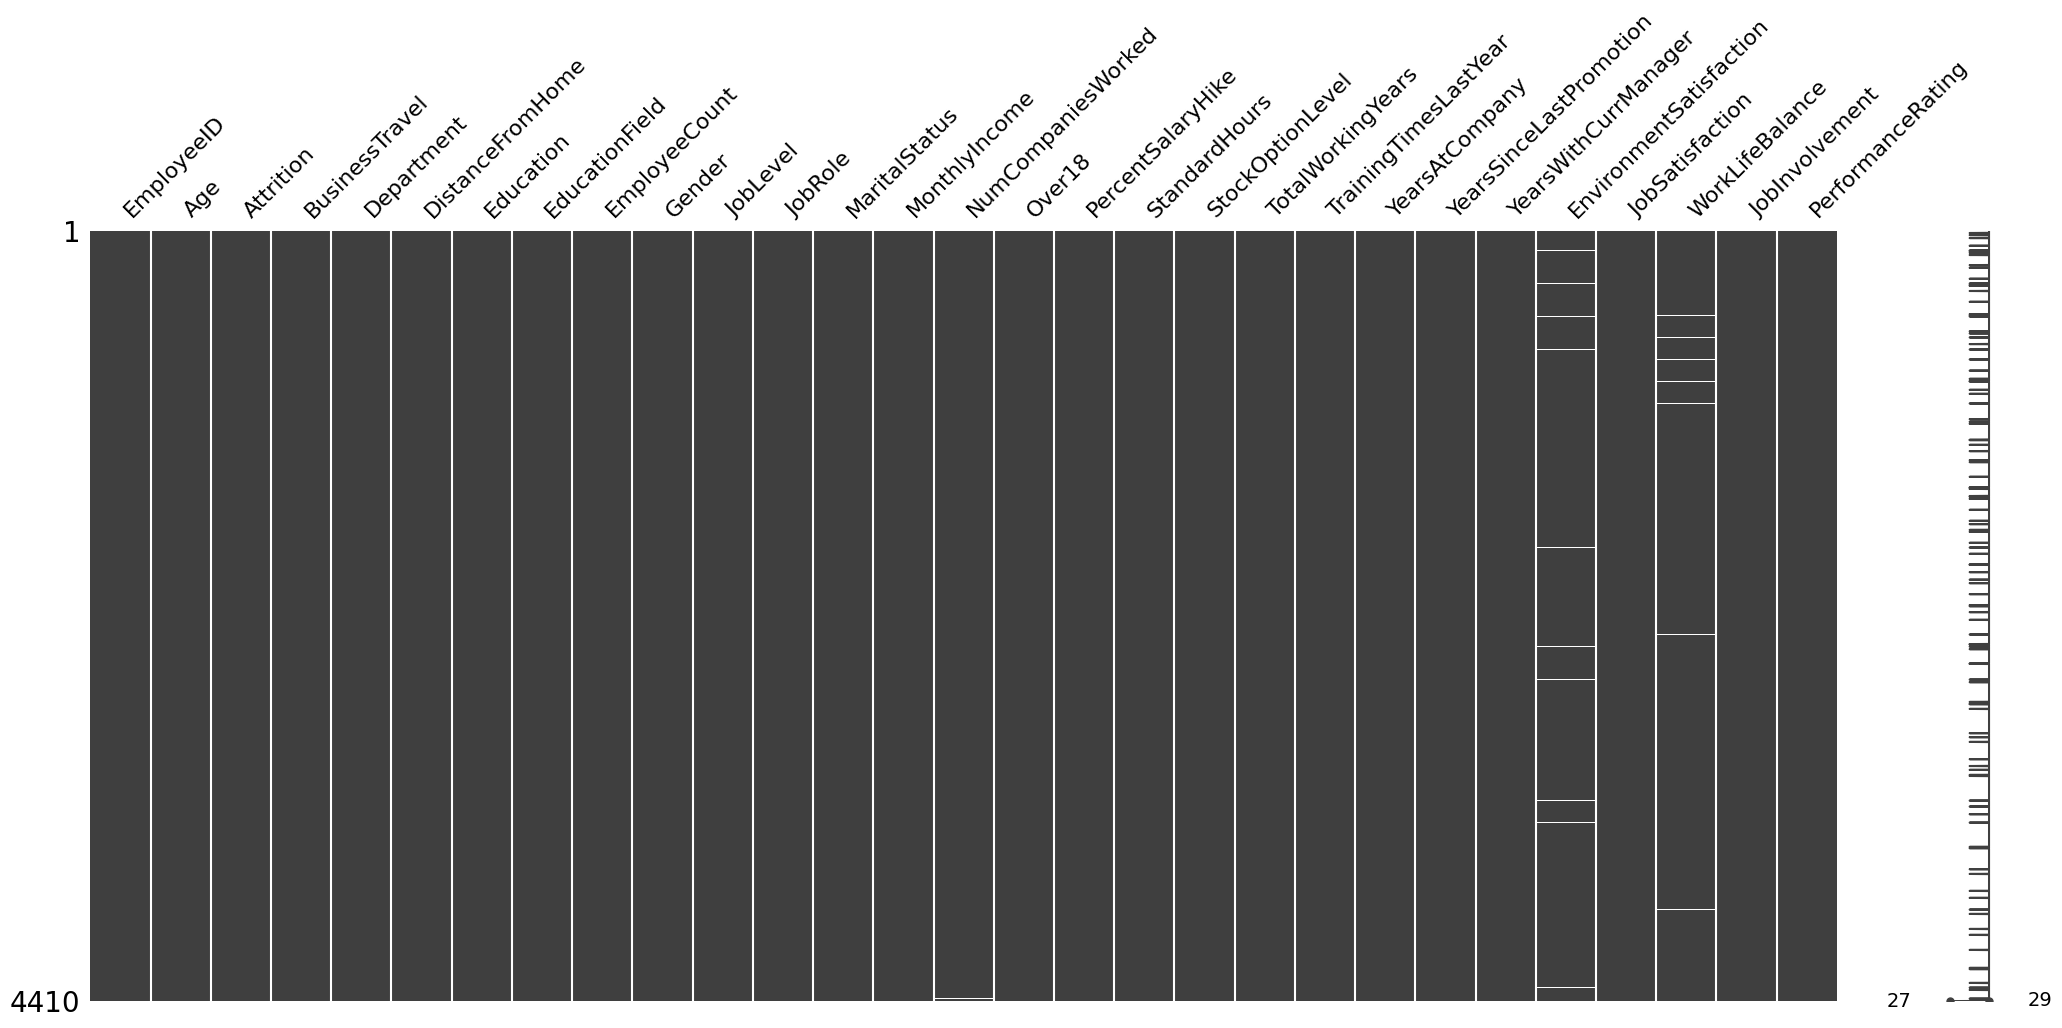

In [9]:
msno.matrix(all_info)
plt.show()

numerical_columns = all_info.select_dtypes(include=['float64', 'int64']).columns
all_info[numerical_columns] = all_info[numerical_columns].fillna(all_info[numerical_columns].median())

categorical_columns = all_info.select_dtypes(include=['object']).columns
all_info[categorical_columns] = all_info[categorical_columns].fillna(all_info[categorical_columns].mode().iloc[0])


Retirer les valeurs manquantes et abbérantes

In [11]:
imputer = SimpleImputer(strategy="median")

# Sélection des colonnes numériques
info_num = all_info[['DistanceFromHome', 'Education', 'JobLevel',
                 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','StockOptionLevel', 'TotalWorkingYears',
                 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
                 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
                 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']]

imputer.fit(info_num)

# Remplacement des valeurs manquantes
info_num_imputed = pd.DataFrame(imputer.transform(info_num), columns=info_num.columns)
info_num_imputed.head()

,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,6.0,2.0,1.0,131160.0,1.0,11.0,0.0,1.0,6.0,1.0,0.0,0.0,3.0,4.0,2.0,3.0,3.0
1,10.0,1.0,1.0,41890.0,0.0,23.0,1.0,6.0,3.0,5.0,1.0,4.0,3.0,2.0,4.0,2.0,4.0
2,17.0,4.0,4.0,193280.0,1.0,15.0,3.0,5.0,2.0,5.0,0.0,3.0,2.0,2.0,1.0,3.0,3.0
3,2.0,5.0,3.0,83210.0,3.0,11.0,3.0,13.0,5.0,8.0,7.0,5.0,4.0,4.0,3.0,2.0,3.0
4,10.0,1.0,1.0,23420.0,4.0,12.0,2.0,9.0,2.0,6.0,0.0,4.0,4.0,1.0,3.0,3.0,3.0


In [12]:
# Sélection des colonnes catégorielles
info_cat = all_info.select_dtypes(include=[object])

# Encodage one-hot des variables catégorielles
encoder = OneHotEncoder(sparse_output=False)
info_cat_prepared = encoder.fit_transform(info_cat)
info_cat_encoded = pd.DataFrame(info_cat_prepared, columns=encoder.get_feature_names_out(input_features=info_cat.columns))
# Vérification du résultat de l'encodage
info_cat_encoded.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Over18_Y
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [13]:
# fusion des Data frame
info_finish = pd.concat([all_info["EmployeeID"], info_num_imputed, info_cat_encoded], axis=1)
info_finish = info_finish.drop(columns="Attrition_Yes")
info_finish = info_finish.rename(columns={'Attrition_No': 'Attrition'})
info_finish.head()

,EmployeeID,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Over18_Y
0,1,6.0,2.0,1.0,131160.0,1.0,11.0,0.0,1.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,10.0,1.0,1.0,41890.0,0.0,23.0,1.0,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,17.0,4.0,4.0,193280.0,1.0,15.0,3.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,4,2.0,5.0,3.0,83210.0,3.0,11.0,3.0,13.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,10.0,1.0,1.0,23420.0,4.0,12.0,2.0,9.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Check si il manque encore des données

In [14]:
info_finish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EmployeeID                         4410 non-null   int64  
 1   DistanceFromHome                   4410 non-null   float64
 2   Education                          4410 non-null   float64
 3   JobLevel                           4410 non-null   float64
 4   MonthlyIncome                      4410 non-null   float64
 5   NumCompaniesWorked                 4410 non-null   float64
 6   PercentSalaryHike                  4410 non-null   float64
 7   StockOptionLevel                   4410 non-null   float64
 8   TotalWorkingYears                  4410 non-null   float64
 9   TrainingTimesLastYear              4410 non-null   float64
 10  YearsAtCompany                     4410 non-null   float64
 11  YearsSinceLastPromotion            4410 non-null   float

## 7- Corrélation

In [ ]:
pertinence_info = [info_finish["PercentSalaryHike"],info_finish["TotalWorkingYears"],info_finish["Attrition"],info_finish["PerformanceRating"],
                   info_finish["YearsAtCompany"],info_finish["YearsSinceLastPromotion"],info_finish["YearsWithCurrManager"]]
pertinence_info = pd.DataFrame(pertinence_info)
pertinence_info = pertinence_info.transpose()
pertinence_info.head()

,PercentSalaryHike,TotalWorkingYears,Attrition,PerformanceRating,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,11.0,1.0,1.0,3.0,1.0,0.0,0.0
1,23.0,6.0,0.0,4.0,5.0,1.0,4.0
2,15.0,5.0,1.0,3.0,5.0,0.0,3.0
3,11.0,13.0,1.0,3.0,8.0,7.0,5.0
4,12.0,9.0,1.0,3.0,6.0,0.0,4.0


## Matrice de coorélation

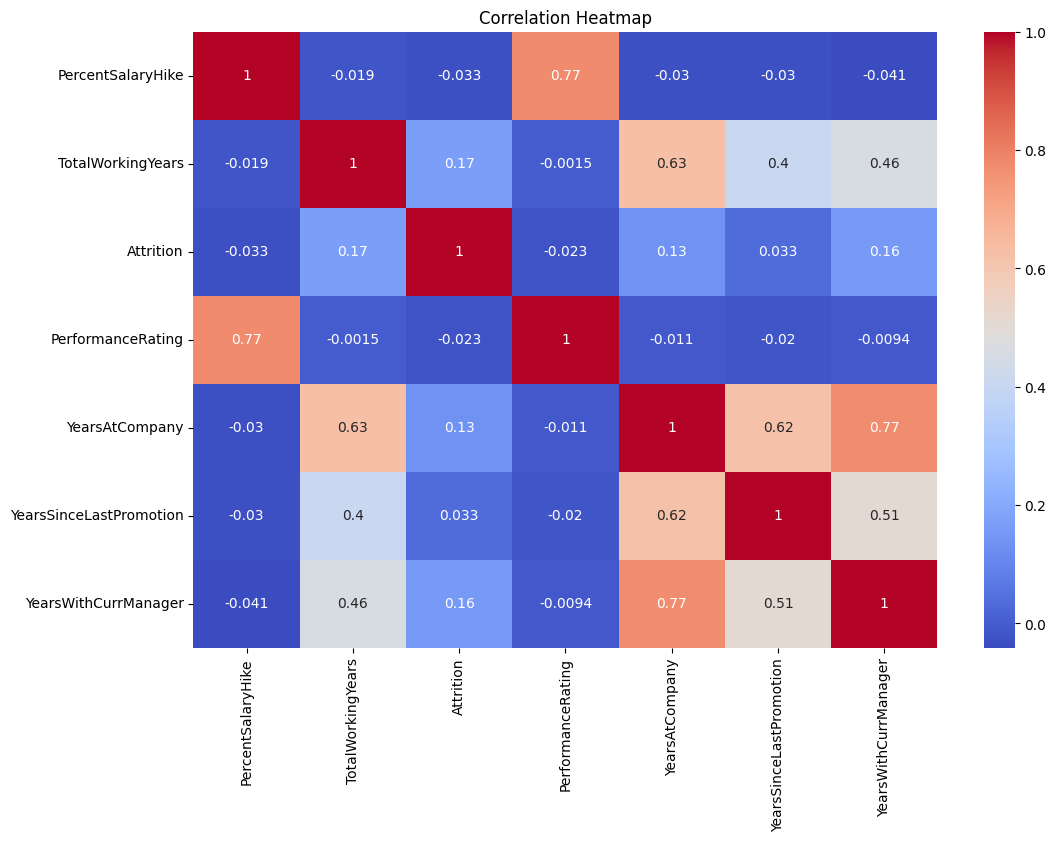

In [ ]:
numerical_columns = pertinence_info.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(pertinence_info[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 8- Analyse statistique

In [15]:
info_finish.describe()

,EmployeeID,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Over18_Y
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0
mean,2205.500000,9.192517,2.912925,2.063946,65029.312925,2.691837,15.209524,0.793878,11.277324,2.799320,...,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,1.0
std,1273.201673,8.105026,1.023933,1.106689,47068.888559,2.493912,3.659108,0.851883,7.774490,1.288978,...,0.284943,0.184745,0.381025,0.254141,0.298211,0.226874,0.399021,0.415483,0.230839,0.0
min,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1103.250000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2205.500000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,3307.750000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,4410.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


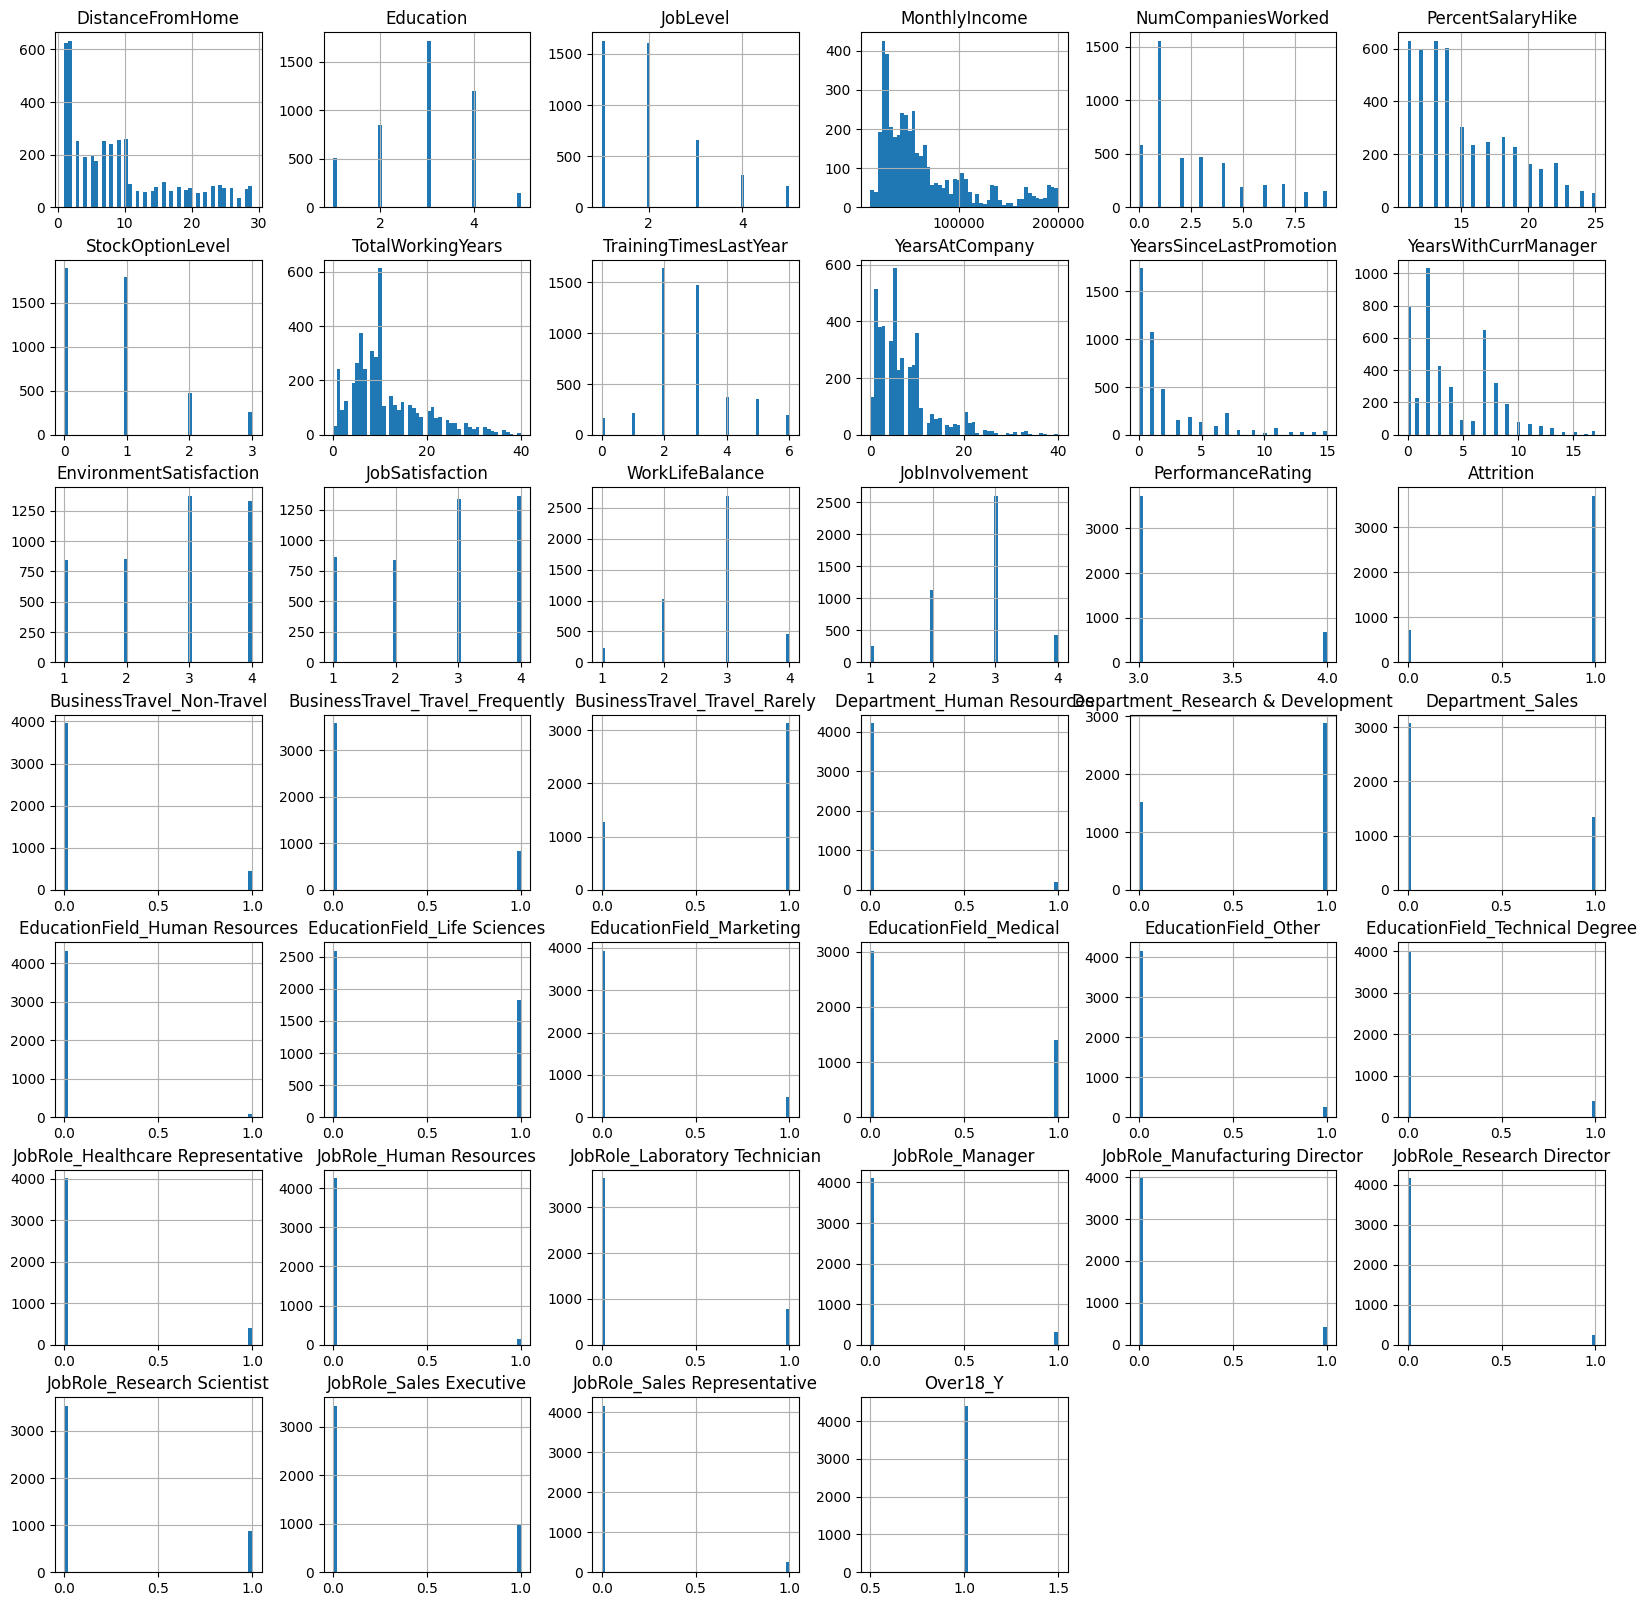

In [30]:
info_finish.iloc[:, 1:].hist(bins=50, figsize=(20, 20))
plt.show()

Analyse de la valeur cible

<ipython-input-23-ad75acd027d7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=info_finish, palette=['steelblue','orange'])


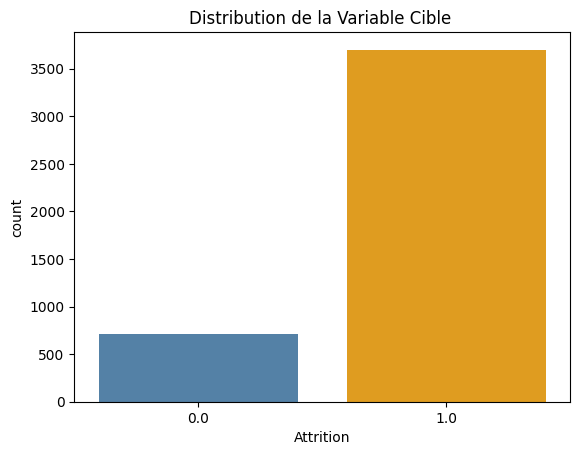

In [23]:
sns.countplot(x='Attrition', data=info_finish, palette=['steelblue','orange'])
plt.title('Distribution de la Variable Cible ')
plt.show()
#0 pour Yes 1 pour no

<ipython-input-26-44a1b6a88a13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=info_finish, palette=['steelblue','orange'])


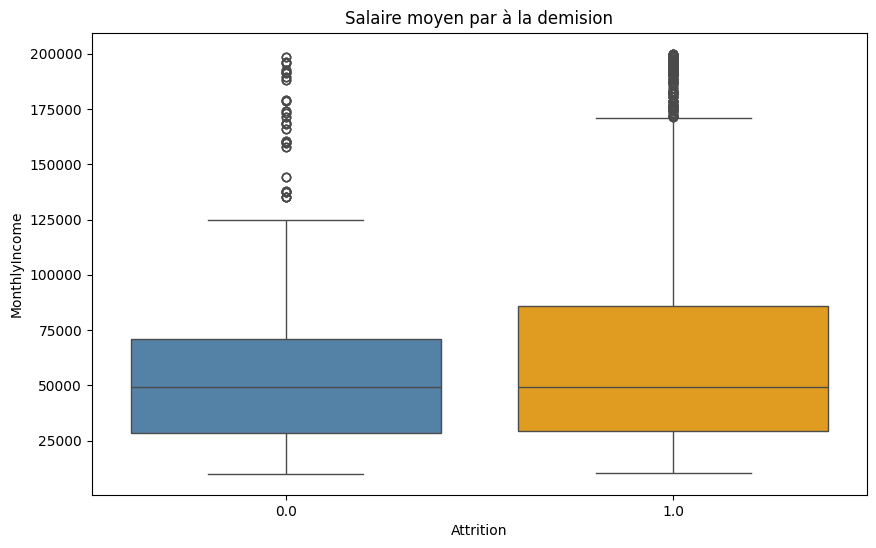

<ipython-input-26-44a1b6a88a13>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='TotalWorkingYears', data=info_finish, palette=['steelblue','orange'])


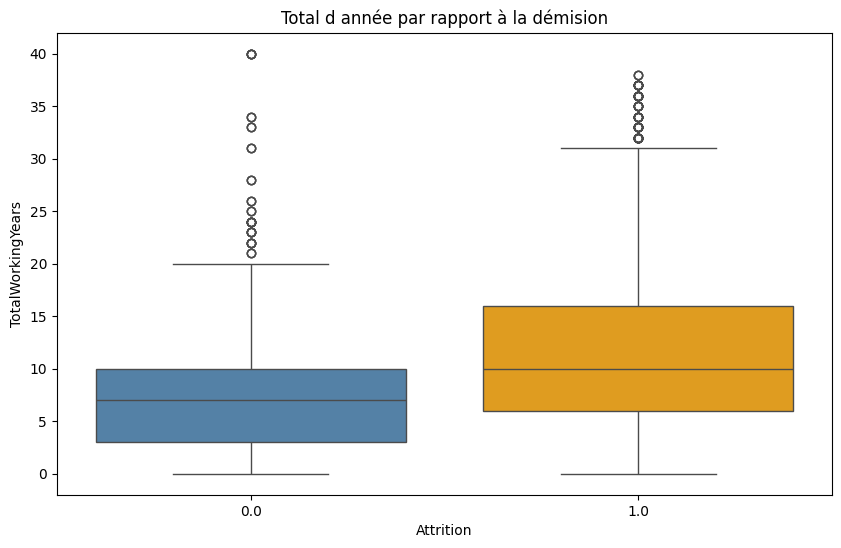

In [26]:
# Boxplot des par rapport à Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=info_finish, palette=['steelblue','orange'])
plt.title('Salaire moyen par à la demision')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=info_finish, palette=['steelblue','orange'])
plt.title('Total d année par rapport à la démision')
plt.show()


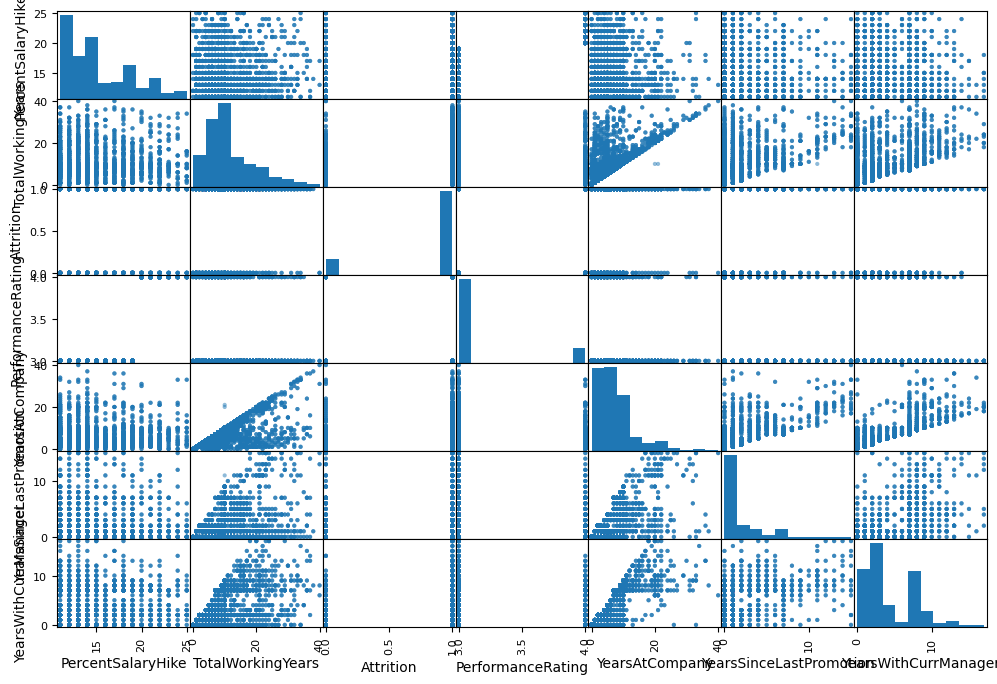

In [ ]:
attribut = ["PercentSalaryHike", "TotalWorkingYears", "Attrition", "PerformanceRating",
            "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]

scatter_matrix = pd.plotting.scatter_matrix(info_finish[attribut], figsize=(12, 8))
plt.show()

## 9- Developpement des modèles

In [ ]:
from sklearn.model_selection import train_test_split
# Séparation des caractéristiques et de la cible

X = info_finish.drop("Attrition",axis=1)
y= info_finish["Attrition"]

# Vérification des dimensions
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


(4410, 40)
(4410,)


In [ ]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {#j'ai enlevé logistic regression car il n'arrive pas à converger vers une solution mdddr trop guez
    "Perceptron": Perceptron(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Entraînement et prédiction
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)


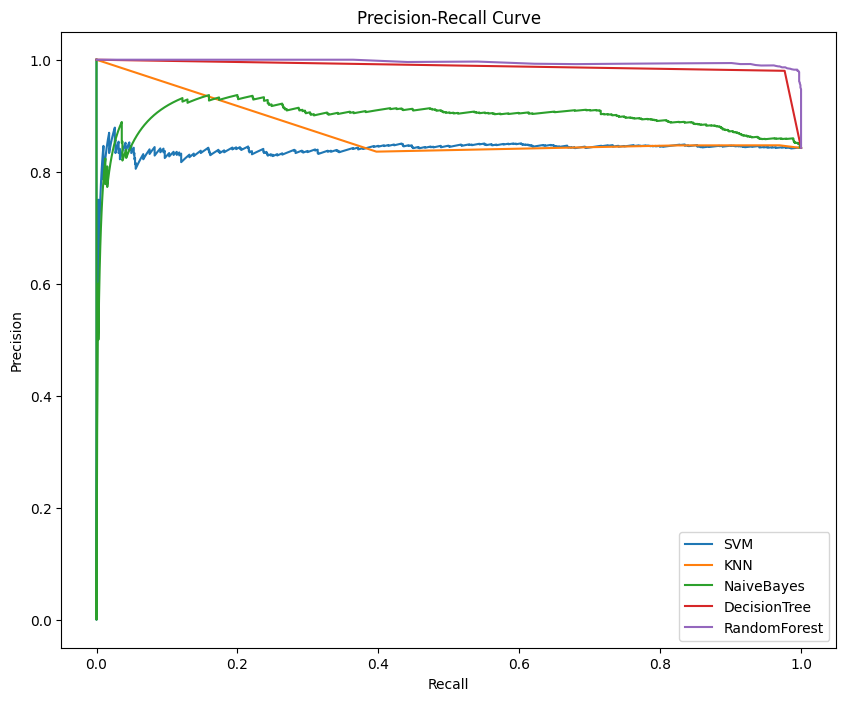

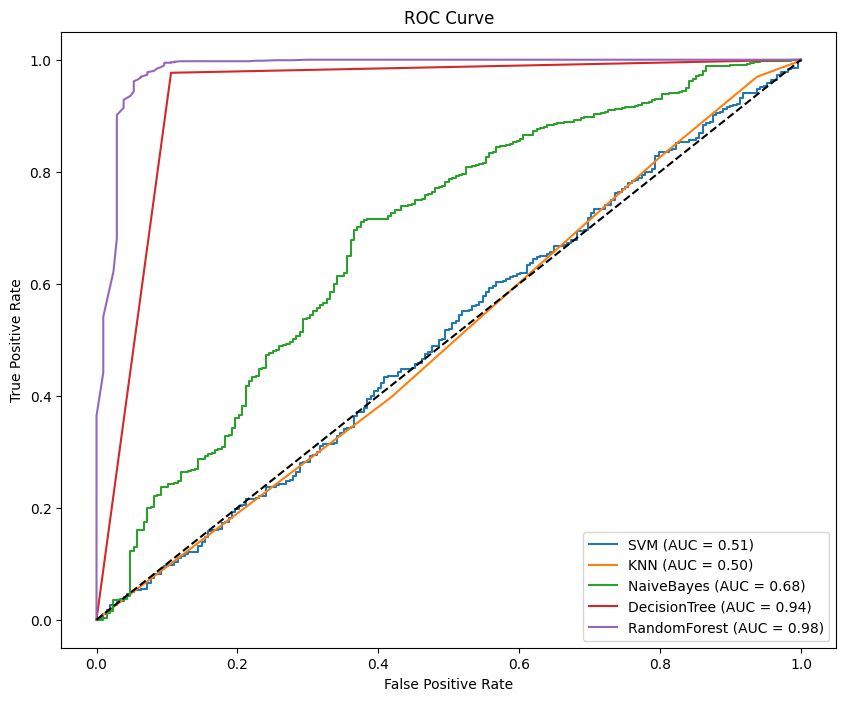

In [ ]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_auc_score,roc_curve
# Tracer les courbes de Précision-Rappel
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f"{name}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


##  RFE (Recursive Feature Elimination)

In [ ]:
from sklearn.feature_selection import RFE
rf_model = RandomForestClassifier(random_state=42)
selector = RFE(estimator=rf_model, n_features_to_select=2)
selector.fit(X_train, y_train)

# Afficher les caractéristiques sélectionnées
print("Features selected:", X_train.columns[selector.support_])
print("Rang des caractéristiques :", selector.ranking_)


Features selected: Index(['EmployeeID', 'MonthlyIncome'], dtype='object')
Rang des caractéristiques : [ 1  3 12 14  1  6  4 15  2  7  5 11  9  8 10 13 16 28 29 17 26 25 22 19
 37 18 31 20 35 30 33 38 27 36 34 24 23 21 32 39]


## Feature Importance

In [ ]:
predictions = {}
feature_importance_results = {}

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                              Feature  Importance
4                       MonthlyIncome    0.090766
8                   TotalWorkingYears    0.088844
1                    DistanceFromHome    0.063497
10                     YearsAtCompany    0.060974
6                   PercentSalaryHike    0.053885
12               YearsWithCurrManager    0.051102
5                  NumCompaniesWorked    0.046105
13            EnvironmentSatisfaction    0.041319
14                    JobSatisfaction    0.038884
0                          EmployeeID    0.038752
9               TrainingTimesLastYear    0.038081
11            YearsSinceLastPromotion    0.035616
15                    WorkLifeBalance    0.034060
2                           Education    0.032781
3                            JobLevel    0.031067
7                    StockOptionLevel    0.029477
16                     JobInvolvement    0.027557
19   BusinessTravel_Travel_Frequently    0.015619
25       EducationField_Life Sciences    0.015484


## Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# j'ai pris randomforest et desisiontree car les meilleurs modèles d'apres les graphiques au dessus
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50)),
    ('DecisionTree', DecisionTreeClassifier(random_state=42))
]

# Modèle de stacking
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
print("Précision sur les données d'entraînement :", stacking_clf.score(X_train, y_train))

Précision sur les données d'entraînement : 1.0
